# Integrantes
  - **Jairo Alonso Cogollo Otero**  -   CC **1.067.946.786**
  - **Jose  Angel de Jesus Lopez**  -   CC **1062682803**
  - Angelica Conde Cuello       -   CC
  - **Sergio Barrera Lopez**        -   CC **1003716380**
  - Jorge Mario Diaz            -   CC
  - Nicolas Aleman              -   CC       


importamos las librerias necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
df = pd.read_csv('archivos/book.csv', dtype={'CODIGO DANE': str})
df = df[~df['FECHA HECHO'].str.startswith('44')].copy()

In [4]:
df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,01/01/2010,FEMENINO,ADULTOS,1


In [5]:
df['ARMAS MEDIOS'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTADO', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'NO REPORTA', 'ESCOPOLAMINA', '-'],
      dtype=object)

In [6]:
df['DEPARTAMENTO'].unique()

array(['ATLÁNTICO', 'BOYACÁ', 'CAQUETÁ', 'CASANARE', 'CUNDINAMARCA',
       'SUCRE', 'VALLE', 'HUILA', 'ANTIOQUIA', 'ARAUCA', 'BOLÍVAR',
       'CALDAS', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'MAGDALENA',
       'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'RISARALDA',
       'SANTANDER', 'TOLIMA', 'VAUPÉS', 'GUAVIARE', 'GUAJIRA', 'QUINDÍO',
       'AMAZONAS', 'VICHADA', 'GUAINÍA', 'SAN ANDRÉS', 'NO REPORTA'],
      dtype=object)

In [7]:
df[['MUNICIPIO', 'CODIGO DANE']].drop_duplicates().sort_values(by='CODIGO DANE')

,MUNICIPIO,CODIGO DANE
4,BOGOTÁ D.C. (CT),11001000
22,CARTAGENA (CT),13001000
33364,ACHÍ,13006000
29554,ALTOS DEL ROSARIO,13030000
92061,ARENAL,13042000
...,...,...
1521,PUERTO CARREÑO (CT),99001000
35029,LA PRIMAVERA,99524000
26371,SANTA ROSALÍA,99624000
6948,CUMARIBO,99773000


In [8]:
df_agg = df.groupby(by=['FECHA HECHO'], as_index=False)['CANTIDAD'].sum()
df_agg.head()

,FECHA HECHO,CANTIDAD
0,01/01/2010,232
1,01/01/2011,257
2,01/01/2012,316
3,01/01/2013,378
4,01/01/2014,350


In [9]:
df_agg.index = pd.DatetimeIndex(pd.to_datetime(df_agg['FECHA HECHO'], format='%d/%m/%Y'))
df_agg.drop(columns='FECHA HECHO', inplace=True)

<AxesSubplot:xlabel='FECHA HECHO'>

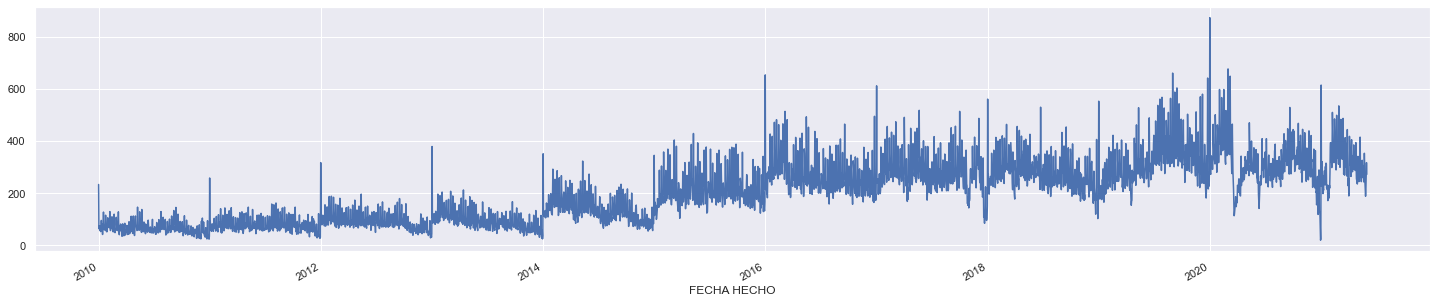

In [10]:
fig, ax = plt.subplots(figsize=(25,5))
df_agg['CANTIDAD'].plot(style='-')

<AxesSubplot:xlabel='FECHA HECHO', ylabel='CANTIDAD'>

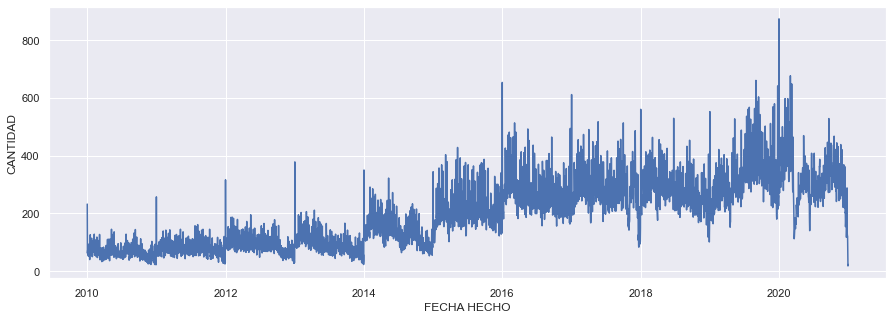

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x='FECHA HECHO', y='CANTIDAD',data=df_agg.loc['2010':'2020'])

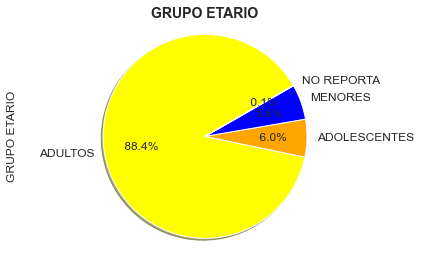

In [12]:
colors=[ "yellow", "orange", "blue", "red", "green"]
sizes=df['GRUPO ETARIO'].value_counts()
pie=df['GRUPO ETARIO'].value_counts().plot(kind='pie',colors=colors, shadow=True, autopct = '% 1.1f%%',startangle=30, radius=1.1,center=(0.5,0.5),
            textprops={'fontsize':12}, frame=False,pctdistance=.65)
labels=sizes.index.unique()
plt.gca().axis("equal")
plt.title(df.columns[6], weight='bold', size=14)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.savefig(str(df.columns[6])+'.png', dpi=100, bbox_inches="tight")
    
plt.show()

el porcentaje de casos de violencia intrafamiliar tiene a ser en adultos pero es tambien de preocupar esa pequeña franja de casos en los que adolocentes y menores se ven afectados

<AxesSubplot:xlabel='ARMAS MEDIOS'>

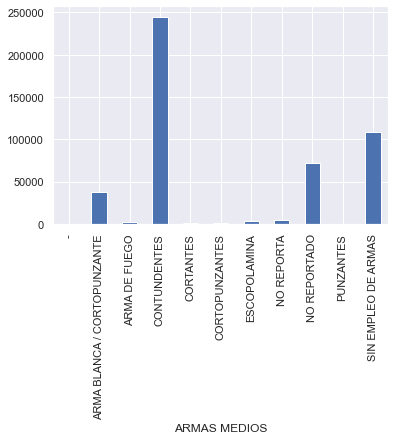

In [13]:
df.groupby('ARMAS MEDIOS')['CANTIDAD'].count().plot(kind='bar')

<AxesSubplot:xlabel='GENERO'>

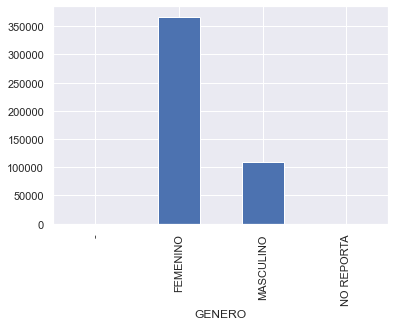

In [14]:
df.groupby('GENERO')['CANTIDAD'].count().plot(kind='bar')

In [15]:

departamento = df['DEPARTAMENTO'].value_counts(ascending=True)
municipio = df['MUNICIPIO'].value_counts(ascending=False)
codigoDane = df['CODIGO DANE'].value_counts()
fechaEcho = df['FECHA HECHO'].value_counts()
armas =df['ARMAS MEDIOS'].value_counts()
genero = df['GENERO'].value_counts()
grupoEtario = df['GRUPO ETARIO'].value_counts()
cantidad = df['CANTIDAD'].value_counts()

grupoEtario.head()

ADULTOS         420230
ADOLESCENTES     28396
MENORES          26447
NO REPORTA         274
Name: GRUPO ETARIO, dtype: int64

In [16]:
melted = df.copy()

In [17]:
melted_asdate = melted

melted_asdate['FECHA HECHO']= pd.to_datetime(melted_asdate['FECHA HECHO'])

0

C:\Users\jairo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\jairo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\jairo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2010' in DD/MM/YYYY format. Provide format or spec

0

In [18]:
melted_asdate.head(5)



,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1


In [19]:
melted = df.copy()
melted_asdate.head(5)


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1


In [20]:

melted_asdate['AÑO']= melted_asdate['FECHA HECHO'].apply(lambda x: x.year)
melted_asdate['MES']= melted_asdate['FECHA HECHO'].apply(lambda x: x.month)
melted_asdate['DIA']= melted_asdate['FECHA HECHO'].apply(lambda x: x.day)

In [21]:
melted_asdate.head(5)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,MES,DIA
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1


<AxesSubplot:xlabel='AÑO'>

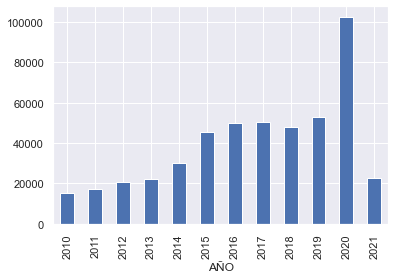

In [22]:
melted_asdate.groupby('AÑO')['CANTIDAD'].count().plot(kind='bar')

el año donde se dispararon los casos de violencia intrafamiliar fueron en el 2020

In [23]:
año = melted_asdate['AÑO'].value_counts()
año

2020    102616
2019     52924
2017     50620
2016     50055
2018     48098
2015     45181
2014     30045
2021     22416
2013     21982
2012     20602
2011     17163
2010     15260
Name: AÑO, dtype: int64

<AxesSubplot:xlabel='AÑO,GENERO'>

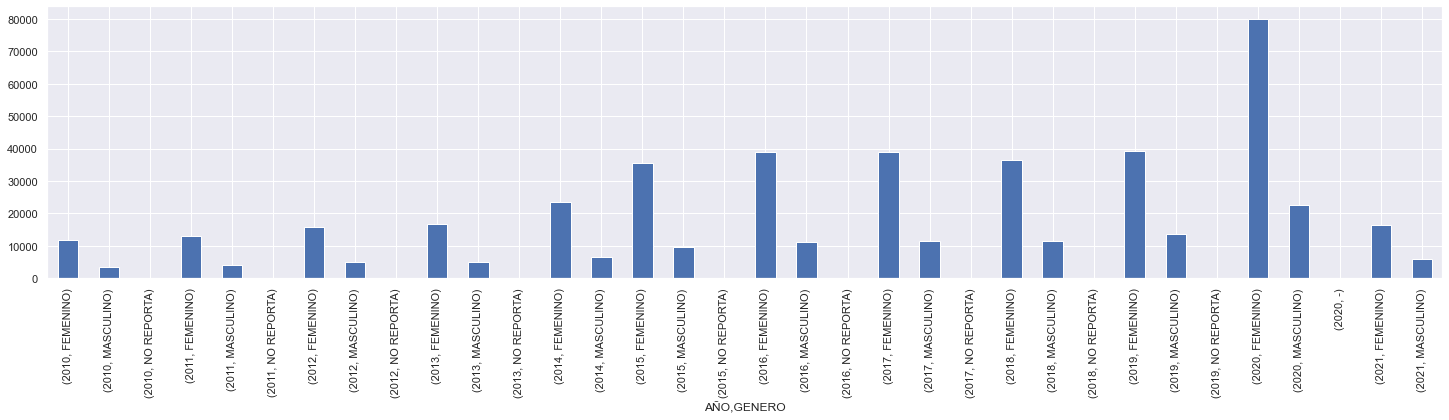

In [24]:
melted_asdate.groupby('AÑO')['GENERO'].value_counts().plot(kind='bar',figsize=(25,5))


## Aqui podemos visualizar como son los casos de violencia intrafamiliar teniendi en cuenta el año y el genero

<AxesSubplot:xlabel='AÑO,ARMAS MEDIOS'>

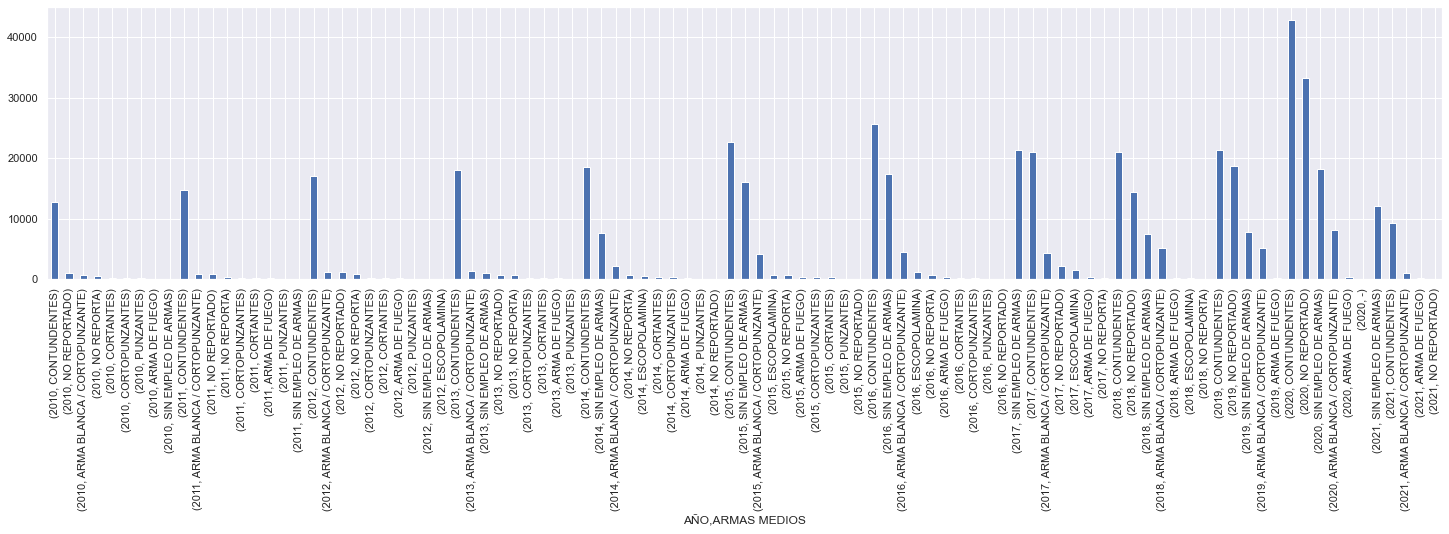

In [25]:
melted_asdate.groupby('AÑO')['ARMAS MEDIOS'].value_counts().plot(kind='bar', figsize=(25,5))

De acuerdo al año se puede apreciar cual es el arma mas usada para agredir  y en que año hubo un aumento de agreciones
dando asi que se pueda deducir que a inicios de **pandemia los casos de violencia intrafamiliar aumentaran a niveles criticos**

In [26]:
melted_asdate['GENERO MASCULINO'] = np.where(df['GENERO'].isin(['MASCULINO']),1,0)


melted_asdate['GENERO FEMENINO'] = np.where(df['GENERO'].isin(['FEMENINO']),1,0)
melted_asdate.head(10)


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,MES,DIA,GENERO MASCULINO,GENERO FEMENINO
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,1,1,0
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,1,1,0
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1
5,SUCRE,SINCELEJO (CT),70001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1
6,VALLE,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,2,2010,1,1,0,1
7,VALLE,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,2,2010,1,1,1,0
8,VALLE,TULUÁ,76834000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1
9,HUILA,PITALITO,41551000,ARMA DE FUEGO,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1


In [27]:
melted_asdate['GENERO MASCULINO'].value_counts()

0    367204
1    109758
Name: GENERO MASCULINO, dtype: int64

<AxesSubplot:xlabel='AÑO'>

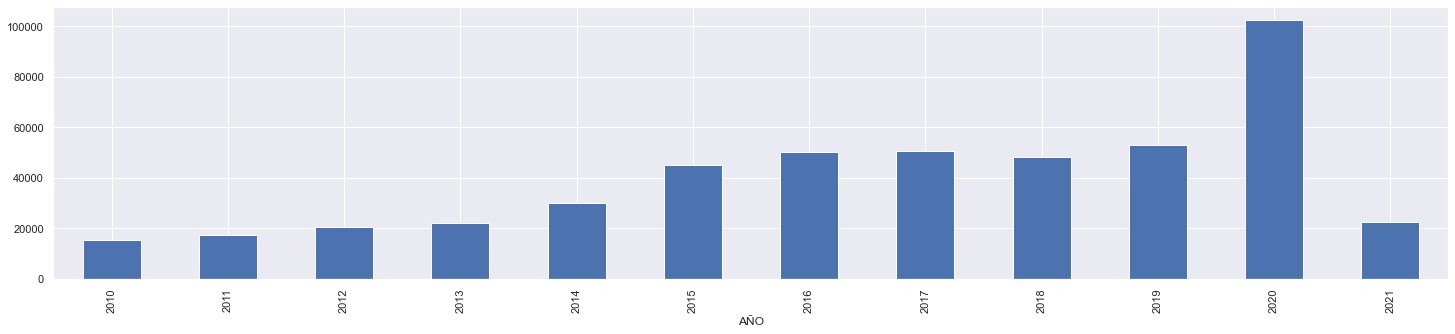

In [28]:
melted_asdate.groupby('AÑO')['GENERO MASCULINO'].count().plot(kind='bar',figsize=(25,5))

en la grafica se puede apreciar la cantidad de hombres agredidos durante los años, se puede ver que hay un gran aumento de violencia en los últimos 5 años.

In [29]:
melted_asdate[melted_asdate['GENERO MASCULINO']>0][['GENERO']]


,GENERO
0,MASCULINO
2,MASCULINO
7,MASCULINO
14,MASCULINO
17,MASCULINO
...,...
476934,MASCULINO
476947,MASCULINO
476950,MASCULINO
476953,MASCULINO


In [30]:
melted_asdate[melted_asdate['GENERO FEMENINO']>0][['GENERO']]

,GENERO
1,FEMENINO
3,FEMENINO
4,FEMENINO
5,FEMENINO
6,FEMENINO
...,...
476957,FEMENINO
476958,FEMENINO
476959,FEMENINO
476960,FEMENINO


<AxesSubplot:xlabel='MES,GENERO'>

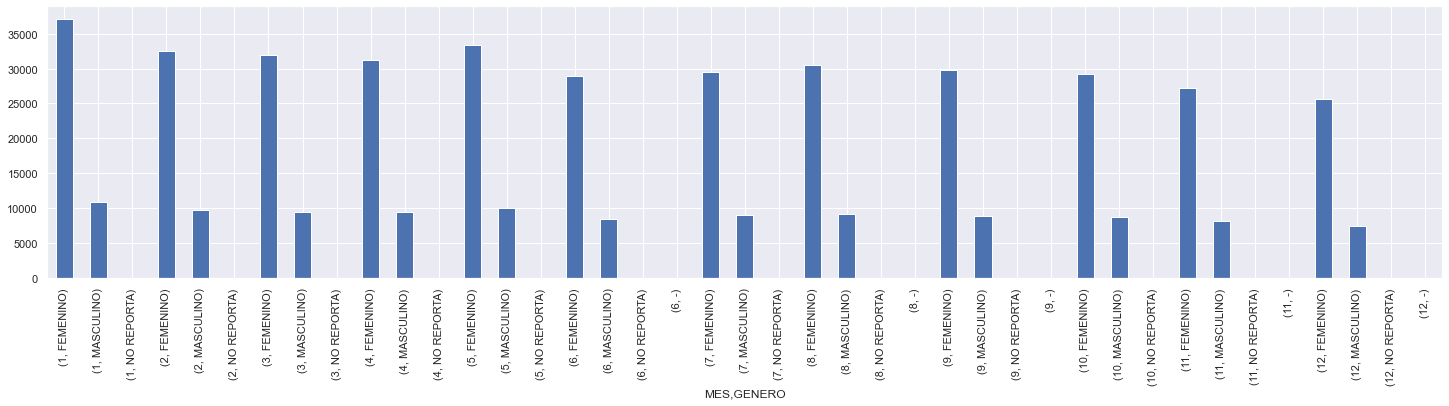

In [31]:
melted_asdate.groupby('MES')['GENERO'].value_counts().plot(kind='bar',figsize=(25,5))

In [32]:
melted_asdate['GRUPO ETARIO'].value_counts()


ADULTOS         420230
ADOLESCENTES     28396
MENORES          26447
NO REPORTA         274
Name: GRUPO ETARIO, dtype: int64

In [33]:
melted_asdate['ADULTOS'] = np.where(melted_asdate['GRUPO ETARIO'].isin(['ADULTOS']),1,0)
melted_asdate['ADOLESCENTES'] = np.where(melted_asdate['GRUPO ETARIO'].isin(['ADOLESCENTES']),1,0)
melted_asdate['MENORES'] = np.where(melted_asdate['GRUPO ETARIO'].isin(['MENORES']),1,0)

melted_asdate.head(10)


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,MES,DIA,GENERO MASCULINO,GENERO FEMENINO,ADULTOS,ADOLESCENTES,MENORES
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,1,1,0,1,0,0
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1,1,0,0
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,1,1,0,1,0,0
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1,1,0,0
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1,1,0,0
5,SUCRE,SINCELEJO (CT),70001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1,1,0,0
6,VALLE,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,2,2010,1,1,0,1,1,0,0
7,VALLE,CALI (CT),76001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,2,2010,1,1,1,0,1,0,0
8,VALLE,TULUÁ,76834000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1,1,0,0
9,HUILA,PITALITO,41551000,ARMA DE FUEGO,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1,1,0,0


In [34]:
melted_asdate['ADULTOS'].value_counts()

1    420230
0     56732
Name: ADULTOS, dtype: int64

<AxesSubplot:xlabel='ARMAS MEDIOS'>

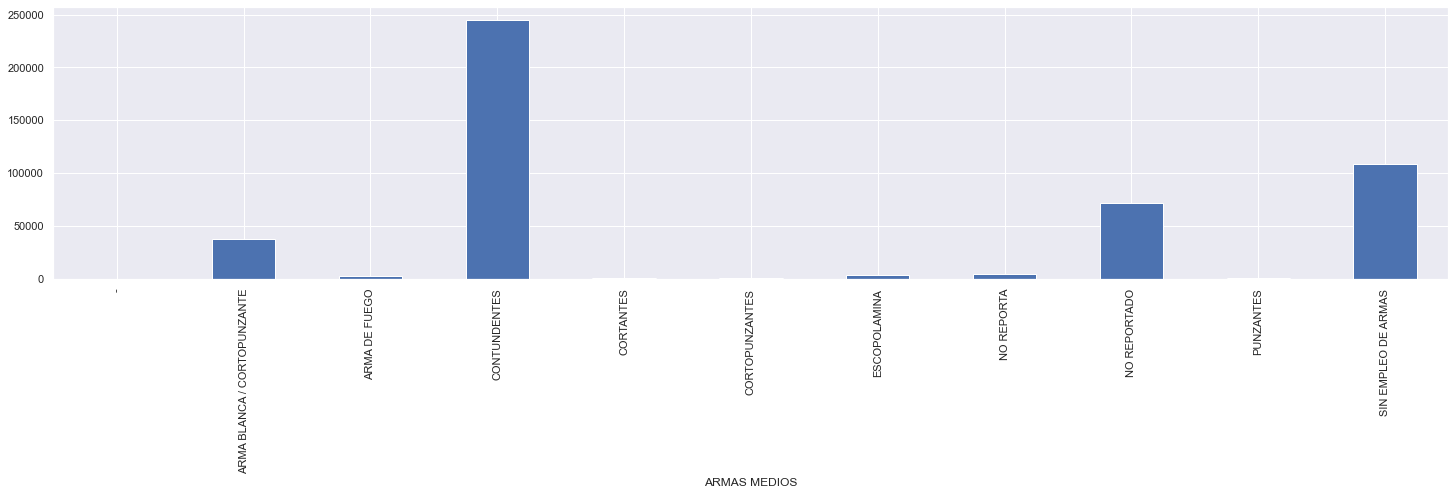

In [35]:
melted_asdate.groupby('ARMAS MEDIOS')['ADULTOS'].count().plot(kind='bar',figsize=(25,5))

In [36]:
melted_asdate['ARMAS MEDIOS'].value_counts()


CONTUNDENTES                   244945
SIN EMPLEO DE ARMAS            108779
NO REPORTADO                    71921
ARMA BLANCA / CORTOPUNZANTE     38070
NO REPORTA                       4421
ESCOPOLAMINA                     3863
ARMA DE FUEGO                    2323
CORTOPUNZANTES                   1167
CORTANTES                        1138
PUNZANTES                         334
-                                   1
Name: ARMAS MEDIOS, dtype: int64

<AxesSubplot:xlabel='MES,ARMAS MEDIOS'>

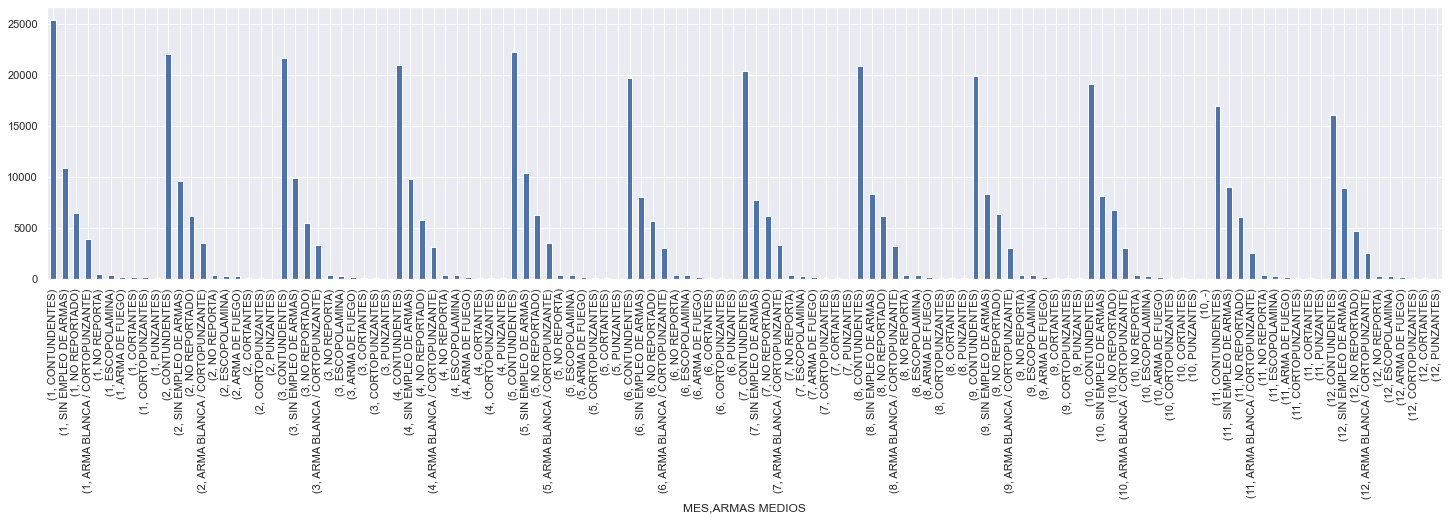

In [37]:
melted_asdate.groupby('MES')['ARMAS MEDIOS'].value_counts().plot(kind='bar',figsize=(25,5))

<AxesSubplot:xlabel='AÑO,ARMAS MEDIOS'>

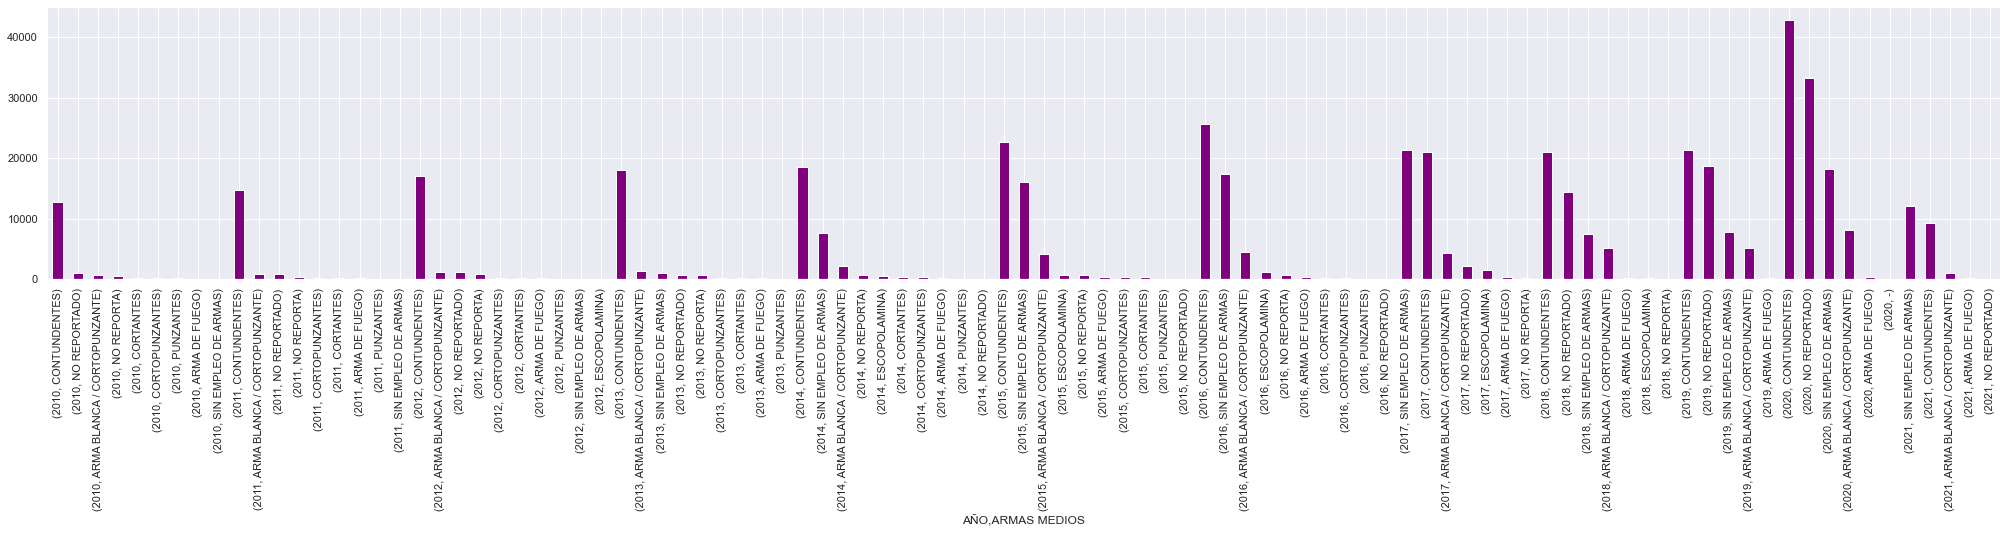

In [38]:
melted_asdate.groupby('AÑO')['ARMAS MEDIOS'].value_counts().plot(kind='bar',figsize=(35,5), color = 'purple')

In [39]:
melted_asdate['MUNICIPIO'].value_counts()

BOGOTÁ D.C. (CT)         53792
MEDELLÍN (CT)            22032
CALI (CT)                18958
BUCARAMANGA (CT)         10420
VILLAVICENCIO (CT)        9675
                         ...  
CEPITÁ                       3
SÁCAMA                       3
SAN JACINTO DEL CAUCA        2
ZAPAYÁN                      1
BOJAYÁ                       1
Name: MUNICIPIO, Length: 1022, dtype: int64

<AxesSubplot:xlabel='AÑO'>

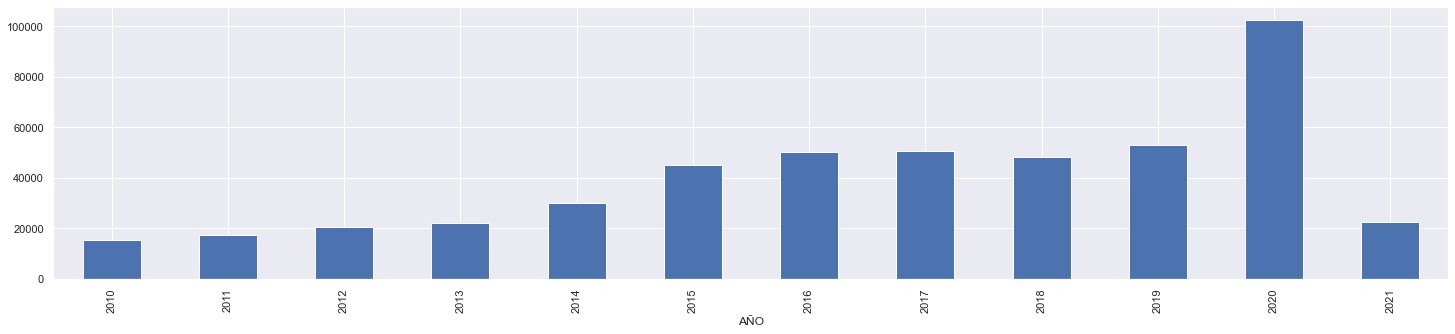

In [40]:
melted_asdate.groupby('AÑO')['DEPARTAMENTO'].count().plot(kind='bar',figsize=(25,5))

In [41]:
melted_asdate['AÑO'].value_counts().head(12)

2020    102616
2019     52924
2017     50620
2016     50055
2018     48098
2015     45181
2014     30045
2021     22416
2013     21982
2012     20602
2011     17163
2010     15260
Name: AÑO, dtype: int64

<AxesSubplot:xlabel='MES,AÑO'>

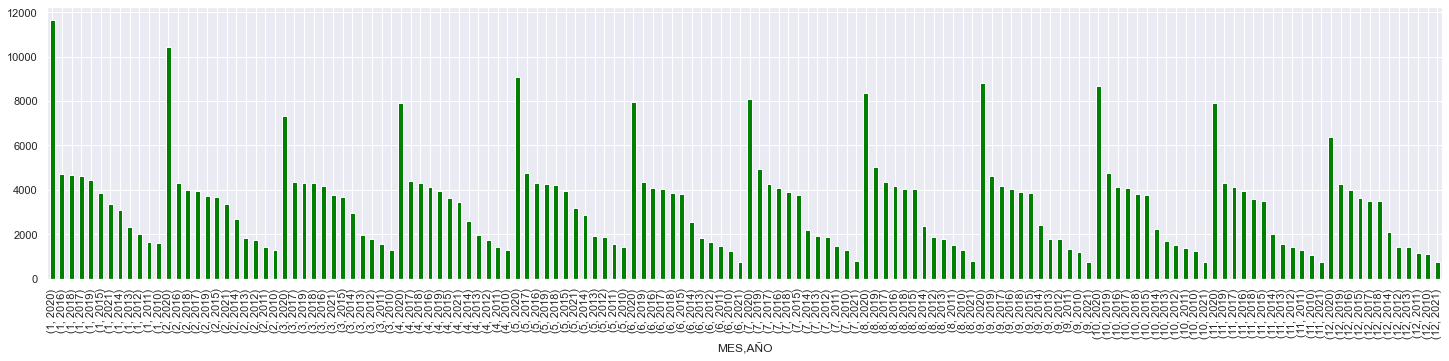

In [42]:
melted_asdate.groupby('MES')['AÑO'].value_counts().plot(kind='bar',figsize=(25,5), color="green")

<AxesSubplot:xlabel='DIA,GENERO'>

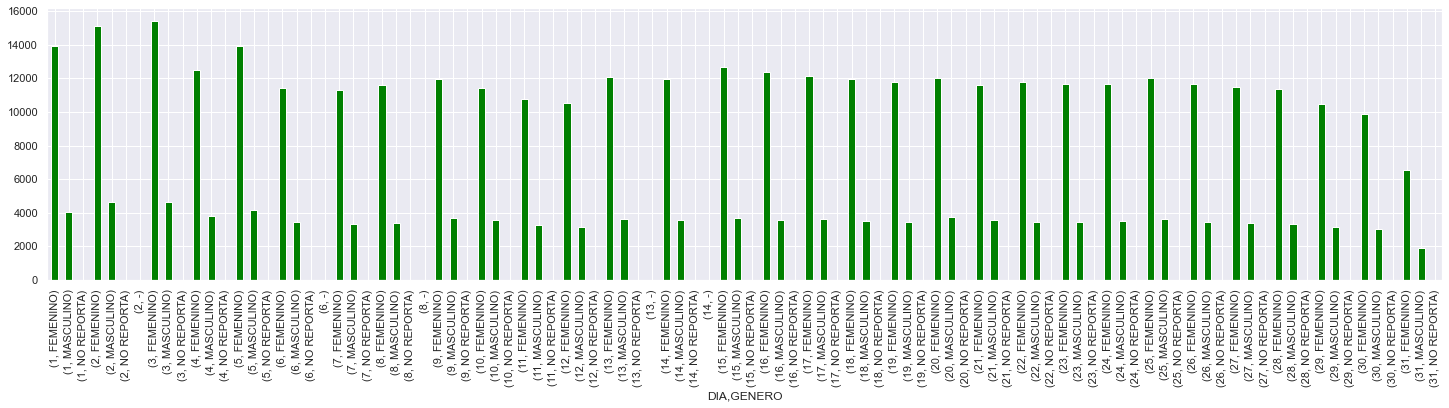

In [43]:
melted_asdate.groupby('DIA')['GENERO'].value_counts().plot(kind='bar',figsize=(25,5), color="green")

In [44]:
pd.DataFrame(melted_asdate.isnull().sum(), columns = ["NA's"]).sort_values(by = "NA's")

,NA's
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,0
FECHA HECHO,0
CANTIDAD,0
AÑO,0
MES,0
DIA,0
GENERO MASCULINO,0


In [45]:
melted_asdate['DEPARTAMENTO'].value_counts()

CUNDINAMARCA          88098
ANTIOQUIA             57288
VALLE                 44909
SANTANDER             38493
BOYACÁ                26920
ATLÁNTICO             17516
TOLIMA                17007
HUILA                 16547
META                  16223
BOLÍVAR               15954
NORTE DE SANTANDER    14919
RISARALDA             14381
NARIÑO                14373
CAUCA                 13947
CÓRDOBA               10800
SUCRE                  9745
MAGDALENA              9691
CALDAS                 8742
CESAR                  7109
CASANARE               6418
CAQUETÁ                4857
QUINDÍO                4800
GUAJIRA                4434
ARAUCA                 3852
PUTUMAYO               3104
CHOCÓ                  2071
AMAZONAS               1408
SAN ANDRÉS             1155
GUAVIARE                886
GUAINÍA                 518
VICHADA                 418
VAUPÉS                  373
NO REPORTA                6
Name: DEPARTAMENTO, dtype: int64

In [46]:
# Número total de valores faltantes en el dataframe
pd.isnull(melted_asdate).values.ravel().sum()

1618

In [47]:
melted_asdate.dropna(axis = 0, how = "all", inplace = True)

In [48]:
pd.DataFrame(melted_asdate.isnull().sum(), columns = ["NA's"]).sort_values(by = "NA's")

,NA's
DEPARTAMENTO,0
MUNICIPIO,0
CODIGO DANE,0
ARMAS MEDIOS,0
FECHA HECHO,0
CANTIDAD,0
AÑO,0
MES,0
DIA,0
GENERO MASCULINO,0


In [49]:
melted_asdate.head(5)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,MES,DIA,GENERO MASCULINO,GENERO FEMENINO,ADULTOS,ADOLESCENTES,MENORES
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,1,1,0,1,0,0
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1,1,0,0
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,1,1,0,1,0,0
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1,1,0,0
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,1,0,1,1,0,0


In [50]:
melted_asdate['CONTUNDENTES'] = np.where(df['ARMAS MEDIOS'].isin(['CONTUNDENTES']),1,0)
melted_asdate['SIN EMPLEO DE ARMAS'] = np.where(df['ARMAS MEDIOS'].isin(['SIN EMPLEO DE ARMAS']),1,0)
melted_asdate['NO REPORTADO'] = np.where(df['ARMAS MEDIOS'].isin(['NO REPORTADO']),1,0)
melted_asdate['ARMA BLANCA'] = np.where(df['ARMAS MEDIOS'].isin(['ARMA BLANCA / CORTOPUNZANTE']),1,0)
melted_asdate['ESCOPOLAMINA'] = np.where(df['ARMAS MEDIOS'].isin(['ESCOPOLAMINA']),1,0)
melted_asdate['ARMA DE FUEGO'] = np.where(df['ARMAS MEDIOS'].isin(['ARMA DE FUEGO']),1,0)
melted_asdate['CORTOPUNZANTES'] = np.where(df['ARMAS MEDIOS'].isin(['CORTOPUNZANTES']),1,0)
melted_asdate['CORTANTES'] = np.where(df['ARMAS MEDIOS'].isin(['CORTANTES']),1,0)
melted_asdate['PUNZANTES'] = np.where(df['ARMAS MEDIOS'].isin(['PUNZANTES']),1,0)
melted_asdate['NO REPORTA'] = np.where(df['ARMAS MEDIOS'].isin(['NO REPORTA']),1,0)
melted_asdate


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,MES,...,CONTUNDENTES,SIN EMPLEO DE ARMAS,NO REPORTADO,ARMA BLANCA,ESCOPOLAMINA,ARMA DE FUEGO,CORTOPUNZANTES,CORTANTES,PUNZANTES,NO REPORTA
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,...,0,0,0,1,0,0,0,0,0,0
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,...,0,0,0,1,0,0,0,0,0,0
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,...,0,0,0,1,0,0,0,0,0,0
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,...,0,0,0,1,0,0,0,0,0,0
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476957,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-05-01,FEMENINO,ADULTOS,1,2021,5,...,0,1,0,0,0,0,0,0,0,0
476958,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-01-14,FEMENINO,ADULTOS,1,2021,1,...,0,1,0,0,0,0,0,0,0,0
476959,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-03-26,FEMENINO,ADULTOS,1,2021,3,...,0,1,0,0,0,0,0,0,0,0
476960,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-03-27,FEMENINO,ADULTOS,1,2021,3,...,0,1,0,0,0,0,0,0,0,0


In [51]:

Departamentos = ['ATLÁNTICO', 'CÓRDOBA', 'CUNDINAMARCA', 'ANTIOQUIA', 'CASANARE', 'BOYACÁ', 'CAQUETÁ']
Variables     = ['CANTIDAD',  'GENERO MASCULINO', 'GENERO FEMENINO', 'ADULTOS','ADOLESCENTES', 'MENORES','CONTUNDENTES','SIN EMPLEO DE ARMAS','NO REPORTADO','ARMA BLANCA','NO REPORTA','ESCOPOLAMINA','ARMA DE FUEGO','CORTOPUNZANTES','CORTANTES','PUNZANTES']

melted_asdate.pivot_table(index = ["DEPARTAMENTO"],
                 values = Variables,
                 aggfunc = { 'GENERO MASCULINO': np.mean, 'GENERO FEMENINO': np.mean, 'ADULTOS': np.mean,'ADOLESCENTES': np.mean, 'MENORES': np.mean,'CONTUNDENTES': np.mean,'SIN EMPLEO DE ARMAS': np.mean,'NO REPORTADO': np.mean,'ARMA BLANCA': np.mean,'NO REPORTA': np.mean,'ESCOPOLAMINA': np.mean,'ARMA DE FUEGO': np.mean,'CORTOPUNZANTES': np.mean,'CORTANTES': np.mean,'PUNZANTES': np.mean, 'CANTIDAD': np.sum}).loc[Departamentos]

,ADOLESCENTES,ADULTOS,ARMA BLANCA,ARMA DE FUEGO,CANTIDAD,CONTUNDENTES,CORTANTES,CORTOPUNZANTES,ESCOPOLAMINA,GENERO FEMENINO,GENERO MASCULINO,MENORES,NO REPORTA,NO REPORTADO,PUNZANTES,SIN EMPLEO DE ARMAS
DEPARTAMENTO,,,,,,,,,,,,,,,,
ATLÁNTICO,0.053266,0.897979,0.087577,0.008449,26985,0.575816,0.001884,0.002055,0.002455,0.767356,0.232416,0.044702,0.022608,0.136504,0.001199,0.161452
CÓRDOBA,0.050833,0.918333,0.097593,0.002315,13223,0.714444,0.002037,0.000648,0.002870,0.816204,0.183611,0.030648,0.010556,0.007130,0.000000,0.162407
CUNDINAMARCA,0.084315,0.801153,0.066880,0.004234,255511,0.197496,0.002316,0.001998,0.022566,0.700686,0.297748,0.104849,0.010318,0.436480,0.000488,0.257214
ANTIOQUIA,0.054479,0.894812,0.069386,0.003613,97758,0.550482,0.001327,0.000978,0.004102,0.766478,0.233138,0.048457,0.009670,0.060047,0.000192,0.300202
CASANARE,0.055002,0.906669,0.072764,0.004674,7297,0.681832,0.002026,0.001870,0.001246,0.826893,0.173107,0.038174,0.005298,0.045341,0.000467,0.184481
BOYACÁ,0.048700,0.910810,0.047140,0.002155,33794,0.747177,0.001895,0.002080,0.000334,0.805275,0.194094,0.039636,0.003418,0.016679,0.000260,0.178863
CAQUETÁ,0.075561,0.873790,0.094297,0.005147,5837,0.736669,0.004735,0.005559,0.000618,0.833436,0.166358,0.049413,0.008236,0.027795,0.000412,0.116533


In [52]:
def Participacion(serie):
    Participacion = serie.sum()/len(serie)*0.01
    return(Participacion)

Punto1 = melted_asdate.pivot_table(index = ["DEPARTAMENTO"],
                          values = Variables,
                          aggfunc = {'GENERO MASCULINO': Participacion,
                           'GENERO FEMENINO': Participacion, 'ADULTOS': Participacion,
                           'ADOLESCENTES': Participacion, 'MENORES': Participacion,
                           'CONTUNDENTES': Participacion,'SIN EMPLEO DE ARMAS': Participacion,
                           'NO REPORTADO': Participacion,'ARMA BLANCA': Participacion,
                           'NO REPORTA': Participacion,'ESCOPOLAMINA': Participacion,
                           'ARMA DE FUEGO': Participacion,'CORTOPUNZANTES': Participacion,
                           'CORTANTES': Participacion,'PUNZANTES': Participacion, 'CANTIDAD': Participacion}).loc[Departamentos]

In [53]:
Punto2 = melted_asdate.groupby("MUNICIPIO").aggregate({'GENERO MASCULINO': np.mean, 'GENERO FEMENINO': np.mean,
                                              'CONTUNDENTES': np.mean})

In [54]:
Punto2

,GENERO MASCULINO,GENERO FEMENINO,CONTUNDENTES
MUNICIPIO,,,
ABEJORRAL,0.131868,0.868132,0.637363
ABREGO,0.133028,0.866972,0.798165
ABRIAQUÍ,0.000000,1.000000,0.500000
ACACÍAS,0.144073,0.855360,0.594441
ACANDÍ,0.058824,0.941176,0.333333
...,...,...,...
ZETAQUIRA,0.130435,0.869565,0.771739
ZIPACÓN,0.271429,0.728571,0.300000
ZIPAQUIRÁ,0.194104,0.805896,0.397732


In [55]:
Punto2.sort_values(by = "GENERO FEMENINO").head(4)

,GENERO MASCULINO,GENERO FEMENINO,CONTUNDENTES
MUNICIPIO,,,
OLAYA HERRERA,0.6,0.4,0.80
PEDRAZA,0.5,0.5,0.50
ALTO BAUDÓ,0.5,0.5,0.25
SALAZAR,0.4,0.6,0.70


In [56]:
Punto2.sort_values(by = "CONTUNDENTES").head(4)

,GENERO MASCULINO,GENERO FEMENINO,CONTUNDENTES
MUNICIPIO,,,
SIPÍ,0.000000,1.000000,0.0
BOJAYÁ,0.000000,1.000000,0.0
BITUIMA,0.130435,0.869565,0.0
LA TOLA,0.000000,1.000000,0.0


In [57]:
Punto2.sort_values(by = "GENERO FEMENINO", ascending = False).head(4)

,GENERO MASCULINO,GENERO FEMENINO,CONTUNDENTES
MUNICIPIO,,,
MEDIO ATRATO,0.0,1.0,0.200000
LA SALINA,0.0,1.0,0.600000
MARGARITA,0.0,1.0,0.700000
COVARACHÍA,0.0,1.0,0.714286


In [58]:
Fechas2 = []
for i in melted_asdate["AÑO"]:
    Fechas2.append( str(i)[:4] + "-01" )

pd.DataFrame(Fechas2)

,0
0,2010-01
1,2010-01
2,2010-01
3,2010-01
4,2010-01
...,...
476957,2021-01
476958,2021-01
476959,2021-01
476960,2021-01


In [59]:
Fechas2 = pd.to_datetime(Fechas2)
Fechas2

DatetimeIndex(['2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01',
               ...
               '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01'],
              dtype='datetime64[ns]', length=476962, freq=None)

In [60]:
melted_asdate.set_index(Fechas2, inplace = True)
melted_asdate

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,MES,...,CONTUNDENTES,SIN EMPLEO DE ARMAS,NO REPORTADO,ARMA BLANCA,ESCOPOLAMINA,ARMA DE FUEGO,CORTOPUNZANTES,CORTANTES,PUNZANTES,NO REPORTA
2010-01-01,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,...,0,0,0,1,0,0,0,0,0,0
2010-01-01,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,...,0,0,0,1,0,0,0,0,0,0
2010-01-01,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1,2010,1,...,0,0,0,1,0,0,0,0,0,0
2010-01-01,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,...,0,0,0,1,0,0,0,0,0,0
2010-01-01,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,2010,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-05-01,FEMENINO,ADULTOS,1,2021,5,...,0,1,0,0,0,0,0,0,0,0
2021-01-01,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-01-14,FEMENINO,ADULTOS,1,2021,1,...,0,1,0,0,0,0,0,0,0,0
2021-01-01,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-03-26,FEMENINO,ADULTOS,1,2021,3,...,0,1,0,0,0,0,0,0,0,0
2021-01-01,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-03-27,FEMENINO,ADULTOS,1,2021,3,...,0,1,0,0,0,0,0,0,0,0


In [61]:
data_GENERO1 = melted_asdate["GENERO MASCULINO"].resample("Y").mean()
data_GENERO2 = melted_asdate["GENERO FEMENINO"].resample("Y").mean()

Resumen = pd.concat([data_GENERO1, data_GENERO2], axis = "columns", keys = ["G. MASCULINO", "G. FEMENINO"])

Resumen

,G. MASCULINO,G. FEMENINO
2010-12-31,0.229948,0.768480
2011-12-31,0.231370,0.767115
2012-12-31,0.236094,0.762693
2013-12-31,0.231144,0.767401
2014-12-31,0.219005,0.780995
2015-12-31,0.211660,0.788097
2016-12-31,0.220917,0.779023
2017-12-31,0.228111,0.771138
2018-12-31,0.237494,0.760738
2019-12-31,0.255498,0.743557


In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import (f1_score, roc_auc_score, precision_recall_curve, 
                            roc_curve, confusion_matrix, classification_report, 
                            accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor


In [63]:
def get_X_y(df, y_name):
  """
  Splits a DataFrame in X (Features) and y (response variable)
  Parameters
  ----------
  df : DataFrame
      A DataFrame that has column features.
  y_name : str
      The name of the target varriable in the DataFrame.

  Returns
  -------
  X : DataFrame
      DataFrame with the features used to predict y.
  y : Array(int)
      Array with the response variable's values.
  """
  y=[y_name]
  X=[col for col in df.columns if col not in y]
  y=df[y].copy().values.flatten()
  X=pd.get_dummies(df[X].copy())
  return X, y


def data_preprocessing_up_or_down_sample(X, y, sample="up", test_size=0.2):
  """
  Applies downsampling or upsampling, and returns the Train-Test split 
  of data.
  Parameters
  ----------
  X : DataFrame
      DataFrame with the features used to predict y.
  y : Array(int)
      Array with the response variable's values.
  sample : str(optional)
      Chooses the method to apply. Downsampling ("down"), 
      upsampling ("up") or no method (anything else). Default is "up". 
  test_size : float(optional)
      Sets the test_size parameter of sklearn.model_selection.train_test_split.
      Default is 0.2
  
  Returns
  -------
  splitting : list, length=2 * len(arrays)
      List containing train-test split of inputs, with the method defined by
      the parameter sample applied.
  """

  # Use the sample parameter to define local variables to select the correct 
  # method
  a,b=0,0
  if sample=="up": 
    a,b=1,0
  if sample=="down":
    a,b=0,1 

  
  # Apply the normal train_test_split to the data
  X_train, X_test, y_train, y_test = train_test_split( X, y, \
                                        test_size=test_size)
  # Using the a and b local variables, apply downsampling or upsampling only
  # if the sample parameter is "up" or "down".

  if a+b>=1:
    X_train_temp, y_train_temp = resample(X_train[y_train == a],
                                    y_train[y_train == a],
                                    n_samples=X_train[y_train == b].shape[0])
    X_train = np.concatenate((X_train[y_train == b], X_train_temp))
    y_train = np.concatenate((y_train[y_train == b], y_train_temp))
  return (X_train, X_test, y_train, y_test)

In [64]:
columnas = ['DEPARTAMENTO', 'MUNICIPIO', 'ARMAS MEDIOS', 'AÑO', 'MES', 'DIA', 'GENERO', 'GRUPO ETARIO', 'CANTIDAD']

data_modelo = melted_asdate[columnas].copy()


In [65]:
data_modelo2 = data_modelo.sample( n = 20000, random_state=20)

In [66]:
X,y =get_X_y( data_modelo2, 'CANTIDAD')


In [67]:
X_train, X_test, Y_train, Y_test= data_preprocessing_up_or_down_sample(X,y, sample="up1", test_size=0.2)


In [68]:
model=RandomForestRegressor(n_estimators=10)
model.fit(X_train, Y_train)



RandomForestRegressor(n_estimators=10)

In [72]:
model.predict(X_test)



array([1.7, 1.2, 1.9, ..., 1. , 6.1, 1. ])

In [73]:
import joblib 
joblib.dump(model, 'modelo.pkl')

['modelo.pkl']

In [70]:
pd.DataFrame(Y_test)

,0
0,1
1,1
2,1
3,5
4,1
...,...
3995,1
3996,1
3997,1
3998,9


In [74]:
list(X.columns)

['AÑO',
 'MES',
 'DIA',
 'DEPARTAMENTO_AMAZONAS',
 'DEPARTAMENTO_ANTIOQUIA',
 'DEPARTAMENTO_ARAUCA',
 'DEPARTAMENTO_ATLÁNTICO',
 'DEPARTAMENTO_BOLÍVAR',
 'DEPARTAMENTO_BOYACÁ',
 'DEPARTAMENTO_CALDAS',
 'DEPARTAMENTO_CAQUETÁ',
 'DEPARTAMENTO_CASANARE',
 'DEPARTAMENTO_CAUCA',
 'DEPARTAMENTO_CESAR',
 'DEPARTAMENTO_CHOCÓ',
 'DEPARTAMENTO_CUNDINAMARCA',
 'DEPARTAMENTO_CÓRDOBA',
 'DEPARTAMENTO_GUAINÍA',
 'DEPARTAMENTO_GUAJIRA',
 'DEPARTAMENTO_GUAVIARE',
 'DEPARTAMENTO_HUILA',
 'DEPARTAMENTO_MAGDALENA',
 'DEPARTAMENTO_META',
 'DEPARTAMENTO_NARIÑO',
 'DEPARTAMENTO_NORTE DE SANTANDER',
 'DEPARTAMENTO_PUTUMAYO',
 'DEPARTAMENTO_QUINDÍO',
 'DEPARTAMENTO_RISARALDA',
 'DEPARTAMENTO_SAN ANDRÉS',
 'DEPARTAMENTO_SANTANDER',
 'DEPARTAMENTO_SUCRE',
 'DEPARTAMENTO_TOLIMA',
 'DEPARTAMENTO_VALLE',
 'DEPARTAMENTO_VAUPÉS',
 'DEPARTAMENTO_VICHADA',
 'MUNICIPIO_ABEJORRAL',
 'MUNICIPIO_ABREGO',
 'MUNICIPIO_ABRIAQUÍ',
 'MUNICIPIO_ACACÍAS',
 'MUNICIPIO_ACANDÍ',
 'MUNICIPIO_ACEVEDO',
 'MUNICIPIO_AGRADO',
 'MUNICIPI

In [76]:
list(data_modelo2['DEPARTAMENTO'].unique())

['ARAUCA',
 'CUNDINAMARCA',
 'BOLÍVAR',
 'ANTIOQUIA',
 'CESAR',
 'CALDAS',
 'BOYACÁ',
 'CAUCA',
 'NORTE DE SANTANDER',
 'SANTANDER',
 'VALLE',
 'GUAJIRA',
 'CÓRDOBA',
 'PUTUMAYO',
 'META',
 'RISARALDA',
 'HUILA',
 'MAGDALENA',
 'QUINDÍO',
 'TOLIMA',
 'ATLÁNTICO',
 'SUCRE',
 'CAQUETÁ',
 'CHOCÓ',
 'NARIÑO',
 'SAN ANDRÉS',
 'GUAVIARE',
 'AMAZONAS',
 'GUAINÍA',
 'CASANARE',
 'VAUPÉS',
 'VICHADA']

In [71]:
Y_test

array([1, 1, 1, ..., 1, 9, 1], dtype=int64)